Dataset from kaggle: https://www.kaggle.com/datasets/rabieelkharoua/predicting-hiring-decisions-in-recruitment-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cleaning and Normalization


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the data
file_path = 'recruitment_data.csv'
recruitment_data = pd.read_csv(file_path)

# Define feature matrix X and target vector y
X = recruitment_data.drop('HiringDecision', axis=1)
y = recruitment_data['HiringDecision']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify numerical, ordinal, and categorical columns
numerical_features = ['Age', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']
categorical_features = ['Gender', 'EducationLevel', 'RecruitmentStrategy']

# Define the preprocessing steps for numerical, ordinal, binary, and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Combine the preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with only preprocessing steps
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit the preprocessing pipeline on the training data
preprocessing_pipeline.fit(X_train)

# Transform both training and test data
X_train_transformed = preprocessing_pipeline.transform(X_train)
X_test_transformed = preprocessing_pipeline.transform(X_test)

# Convert the transformed data back to DataFrames for easier inspection and usage
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=preprocessor.get_feature_names_out())

# Display the first few rows of the transformed training data
X_train_transformed_df.head()


,num__Age,num__ExperienceYears,num__PreviousCompanies,num__DistanceFromCompany,num__InterviewScore,num__SkillScore,num__PersonalityScore,cat__Gender,cat__EducationLevel,cat__RecruitmentStrategy
0,0.220386,1.551460,1.406843,-0.169708,-1.483445,0.474223,0.559839,1.0,2.0,2.0
1,-0.320281,1.551460,1.406843,0.020589,-0.534664,0.137098,1.339635,0.0,2.0,1.0
2,0.112253,0.487150,-0.707449,1.478348,-1.624005,-1.177691,-0.355574,1.0,2.0,1.0
3,-0.320281,1.551460,1.406843,0.716733,1.714298,0.845061,1.610868,1.0,1.0,2.0
4,-1.077215,1.125736,-0.002685,0.760970,-1.132044,-1.110266,-1.643933,0.0,1.0,2.0


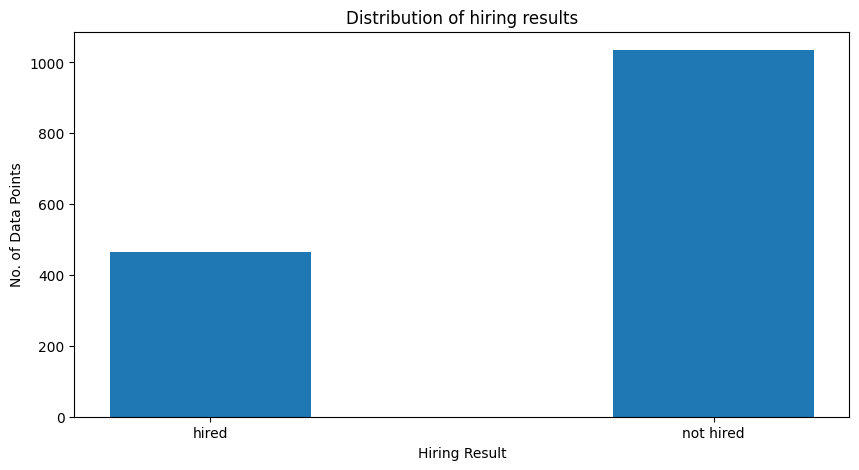

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

hiring_distribution = {'hired':0, 'not hired':0}
for i in y:
  if(i):
    hiring_distribution['hired'] += i
  else:
    hiring_distribution['not hired'] += 1


# creating the dataset
labels = list(hiring_distribution.keys())
values = list(hiring_distribution.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(labels, values,
        width = 0.4)

plt.xlabel("Hiring Result")
plt.ylabel("No. of Data Points")
plt.title("Distribution of hiring results")
plt.show()

Text(0, 0.5, 'Skill Score')

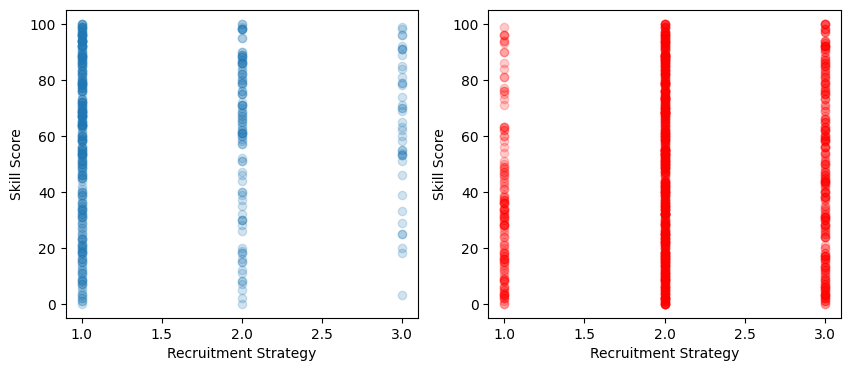

In [ ]:
hired_list = [[],[]]
not_hired_list = [[],[]]


for i in range(len(X)):
  if y[i]:
    hired_list[0].append(X['RecruitmentStrategy'][i])
    hired_list[1].append(X['SkillScore'][i])
  else:
    not_hired_list[0].append(X['RecruitmentStrategy'][i])
    not_hired_list[1].append(X['SkillScore'][i])


fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(hired_list[0], hired_list[1], alpha=0.2)
ax1.set_xlabel("Recruitment Strategy")
ax1.set_ylabel("Skill Score")

ax2.scatter(not_hired_list[0], not_hired_list[1], alpha=0.2, color='red')
ax2.set_xlabel("Recruitment Strategy")
ax2.set_ylabel("Skill Score")

# Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the classifier on the preprocessed training data
decision_tree.fit(X_train_transformed, y_train)

# Predict the target values for the test set
y_pred = decision_tree.predict(X_test_transformed)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8488888888888889
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       321
           1       0.71      0.79      0.75       129

    accuracy                           0.85       450
   macro avg       0.81      0.83      0.82       450
weighted avg       0.86      0.85      0.85       450

Confusion Matrix:
[[280  41]
 [ 27 102]]


The decision tree classifier achieved an accuracy of 84.89%, indicating that it correctly classified approximately 85% of the instances in the test set. The precision and recall for class 0 were 0.91 and 0.87, respectively, while for class 1, they were 0.71 and 0.79, showing a higher performance for class 0. The confusion matrix reveals that the model misclassified 41 instances of class 0 as class 1 and 27 instances of class 1 as class 0, reflecting a higher error rate in identifying class 1 correctly.

## Finding Best Decision Tree Hyperparameters

### Grid Search Cross-Validation


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for DecisionTreeClassifier
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Instantiate a DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Instantiate the GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the final model with the best parameters
best_model = grid_search.best_estimator_

# Evaluate the final model on the test set
y_pred = best_model.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.895238095238095
Test Accuracy: 0.8911111111111111
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       321
           1       0.83      0.78      0.80       129

    accuracy                           0.89       450
   macro avg       0.87      0.86      0.86       450
weighted avg       0.89      0.89      0.89       450

Confusion Matrix:
[[301  20]
 [ 29 100]]


The initial decision tree model with default hyperparameters achieved an accuracy of 84.89%, with a precision of 0.91 and recall of 0.87 for class 0, and a precision of 0.71 and recall of 0.79 for class 1. After performing a grid search with cross-validation, the optimal hyperparameters identified were {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}, resulting in an improved accuracy of 89.11%. The optimized model showed a better balance with a precision of 0.83 and recall of 0.78 for class 1, and a slightly higher performance for class 0 with a precision of 0.91 and recall of 0.94, demonstrating a more robust and generalized model.

### Randomized Search Cross Validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions for DecisionTreeClassifier
param_distributions = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy']
}

# Instantiate a DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Instantiate the RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(
    estimator=decision_tree,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=42,  # For reproducibility
    verbose=1
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_transformed, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Train the final model with the best parameters
best_model = random_search.best_estimator_

# Evaluate the final model on the test set
y_pred = best_model.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 3}
Best Cross-Validation Accuracy: 0.9047619047619048
Test Accuracy: 0.9088888888888889
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       321
           1       0.85      0.83      0.84       129

    accuracy                           0.91       450
   macro avg       0.89      0.89      0.89       450
weighted avg       0.91      0.91      0.91       450

Confusion Matrix:
[[302  19]
 [ 22 107]]


With using a randomized search over a specified parameter space we once again see slight improvement to all metrics over both classifications

## Random Forest with Randomized Search CV

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 153}
Best Cross-Validation Accuracy: 0.9152380952380952
Test Accuracy: 0.9244444444444444
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       321
           1       0.93      0.80      0.86       129

    accuracy                           0.92       450
   macro avg       0.93      0.89      0.90       450
weighted avg       0.92      0.92      0.92       450

Confusion Matrix:
[[313   8]
 [ 26 103]]


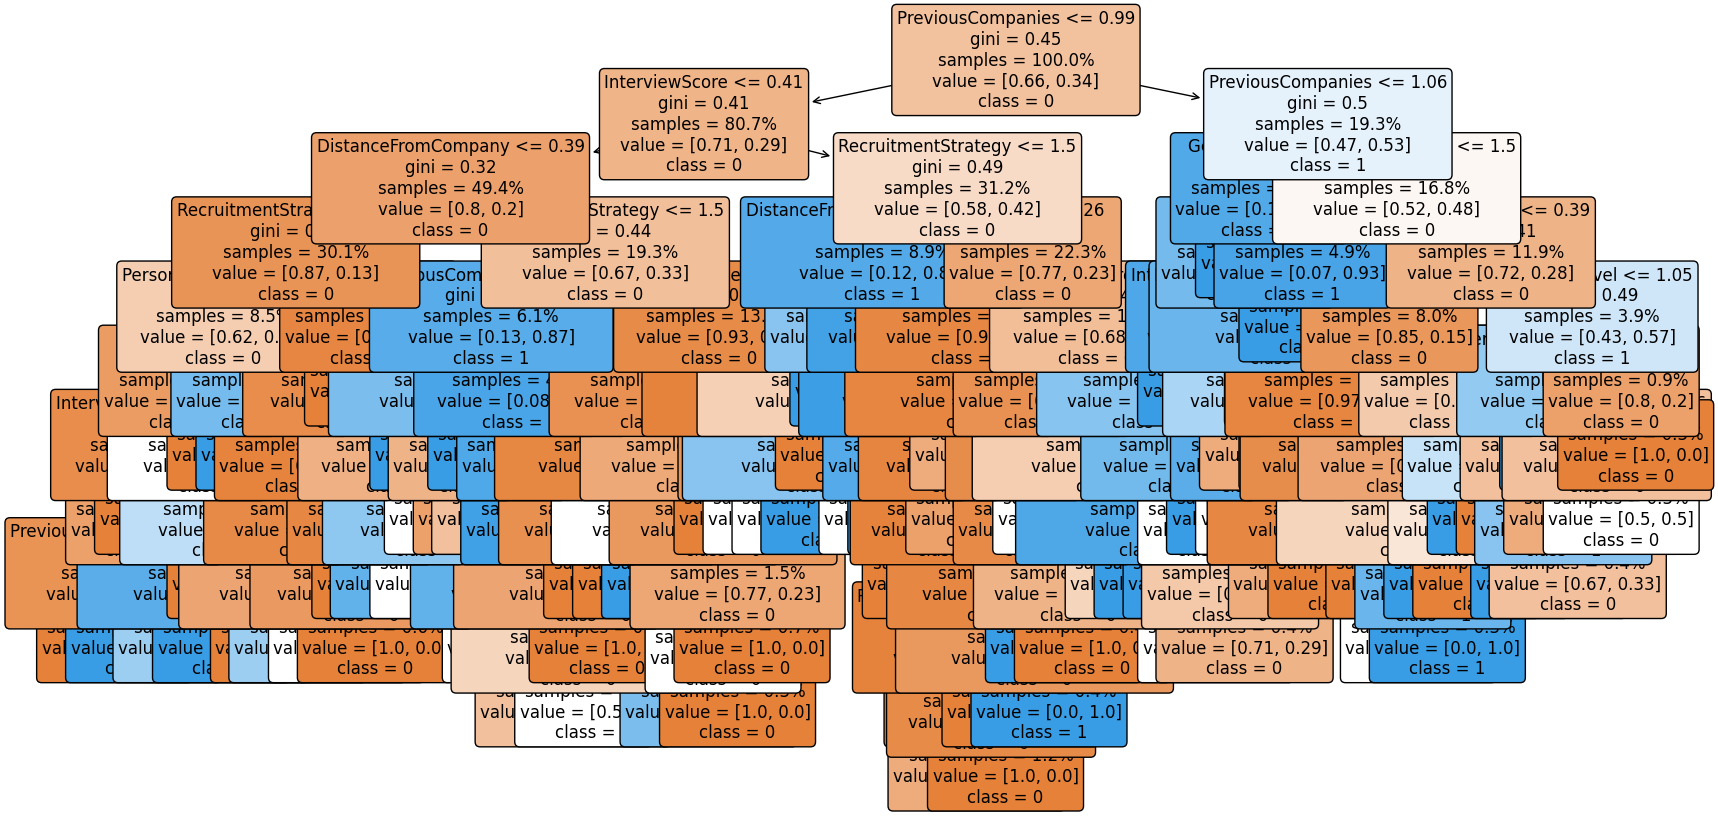

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree

# Define the parameter distributions for RandomForestClassifier
param_distributions = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Instantiate a RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)

# Instantiate the RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=42,  # For reproducibility
    verbose=1
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_transformed, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Train the final model with the best parameters
best_model = random_search.best_estimator_

# Evaluate the final model on the test set
y_pred = best_model.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

# Extract one of the trees from the random forest
estimator = best_model.estimators_[0]

# Plot the tree with feature names and class names
plt.figure(figsize=(20, 10))
plot_tree(
    estimator,
    filled=True,
    feature_names=X_train.columns,  # Ensure you pass the feature names here
    class_names=[str(cls) for cls in best_model.classes_],  # Class names as strings
    rounded=True,
    proportion=True,  # Shows the proportion of samples for each class in the node
    precision=2,  # Sets the precision of floating-point numbers
    fontsize=12  # Adjust font size for readability
)
plt.show()

The optimized RandomForestClassifier demonstrated excellent performance with the highest accuracy, precision, and F1-scores, particularly for the majority class (Not Hired). The hyperparameters selected through randomized search effectively balanced the complexity of the model, reducing the risk of overfitting while maintaining high predictive power. The slight reduction in recall for the Hired class suggests that while the model is very precise, it may benefit from further tuning or additional data to better capture the characteristics of true hires.

### Determining Best Features


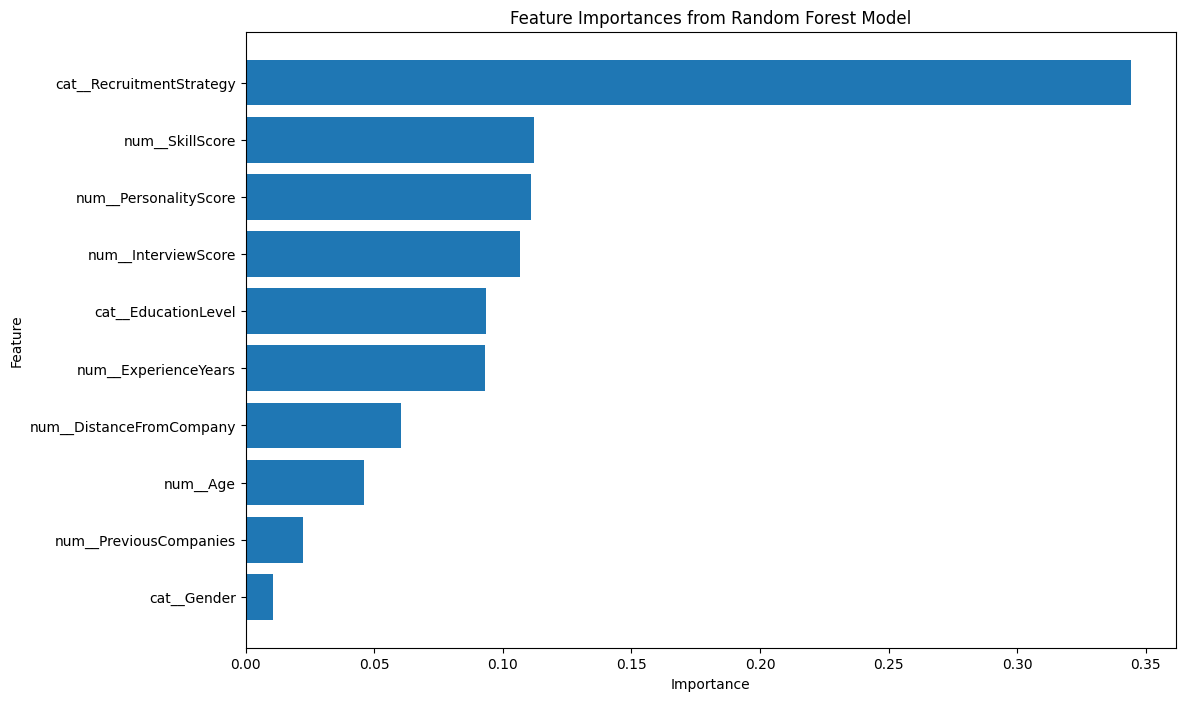

In [ ]:
# Assuming you have a list of feature names from your preprocessing pipeline
feature_names = preprocessor.get_feature_names_out()

# Extract feature importances from the best model
importances = best_model.feature_importances_

# Create a DataFrame for easy plotting
feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

### Model Performance With Feature Selection

In [ ]:
# Feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Convert numpy arrays back to DataFrames
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)

# Removing the least important features
least_important_features = ['cat__Gender', 'num__PreviousCompanies', 'num__Age', 'num__DistanceFromCompany']
X_train_reduced = X_train_transformed_df.drop(columns=least_important_features)
X_test_reduced = X_test_transformed_df.drop(columns=least_important_features)
# Define the parameter distributions for RandomForestClassifier
param_distributions = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Instantiate a RandomForestClassifier
random_forest_reduced = RandomForestClassifier(random_state=42)

# Instantiate the RandomizedSearchCV with cross-validation
random_search_reduced = RandomizedSearchCV(
    estimator=random_forest_reduced,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=42,  # For reproducibility
    verbose=1
)

# Fit the RandomizedSearchCV to the training data
random_search_reduced.fit(X_train_reduced, y_train)

# Get the best parameters and the best score
best_params_reduced = random_search_reduced.best_params_
best_score_reduced = random_search_reduced.best_score_

# Train the final model with the best parameters
best_model_reduced = random_search_reduced.best_estimator_

# Evaluate the final model on the test set
y_pred_reduced = best_model_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
report_reduced = classification_report(y_test, y_pred_reduced)
conf_matrix_reduced = confusion_matrix(y_test, y_pred_reduced)

# Print the results
print(f"Best Parameters (Reduced Features): {best_params_reduced}")
print(f"Best Cross-Validation Accuracy (Reduced Features): {best_score_reduced}")
print(f"Test Accuracy (Reduced Features): {accuracy_reduced}")
print("Classification Report (Reduced Features):")
print(report_reduced)
print("Confusion Matrix (Reduced Features):")
print(conf_matrix_reduced)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters (Reduced Features): {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 153}
Best Cross-Validation Accuracy (Reduced Features): 0.9257142857142856
Test Accuracy (Reduced Features): 0.9333333333333333
Classification Report (Reduced Features):
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       321
           1       0.93      0.83      0.88       129

    accuracy                           0.93       450
   macro avg       0.93      0.90      0.92       450
weighted avg       0.93      0.93      0.93       450

Confusion Matrix (Reduced Features):
[[313   8]
 [ 22 107]]


The feature selection process improved the model's performance by removing the least important features, thereby reducing noise and enhancing the model's ability to focus on the most relevant information. By eliminating features that contributed minimally to the predictive power, the model became less complex, leading to better generalization and higher accuracy. The Randomized Search CV further optimized the hyperparameters, resulting in a best cross-validation accuracy of 92.57% and a test accuracy of 93.33%, both of which are the highest achieved so far. This streamlined feature set allowed the model to achieve a balanced performance, as reflected in the precision, recall, and F1-scores, while maintaining robustness across different classes.

## Decision Tree Model Summary

The progression of models has shown a consistent improvement in performance metrics at each step. Starting with a general decision tree model, the initial accuracy was 84.89%, with notable differences in precision and recall between the two classes. By employing Grid Search CV, optimal hyperparameters were identified, leading to a significant increase in test accuracy to 89.11%, and better-balanced precision and recall. Further enhancement was achieved through Randomized Search CV, which improved the test accuracy to 90.89% and provided a more refined model with optimal hyperparameters, resulting in a more balanced precision and recall.

Introducing a Random Forest model with Randomized Search CV further elevated the performance, with a test accuracy of 92.44%. This model leveraged the ensemble method's strength to better capture the data's complexity and variability. Finally, by conducting feature selection and focusing on the most important features, the model achieved the best performance yet, with a test accuracy of 93.33%. This step reduced noise and improved generalization, demonstrating the effectiveness of feature importance in refining model accuracy, precision, recall, and overall robustness.

AUC: 0.9022676229805116


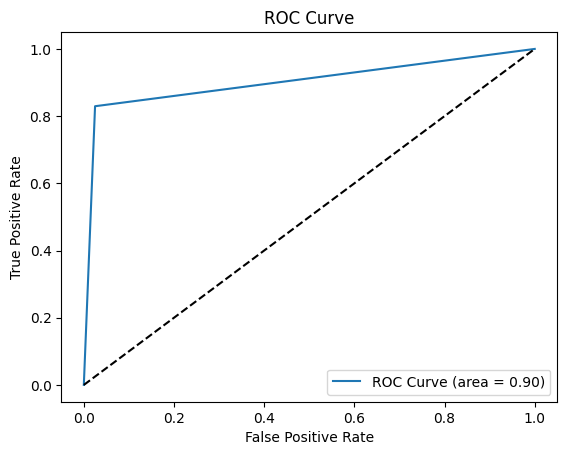

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_reduced)

# Calculate ROC curve and AUC
roc_auc = roc_auc_score(y_test,y_pred_reduced)

# Print AUC
print("AUC:", roc_auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

## Standard Logitsic Regression Without Regularization

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
Logistic = LogisticRegression(C = 100000, solver = 'liblinear')
Logistic.fit(X_train_transformed,y_train)
# Predict the target values for the test set
y_predL = Logistic.predict(X_test_transformed)

# Evaluate the model's performance
accuracyL = accuracy_score(y_test, y_predL)
reportL = classification_report(y_test, y_predL)
conf_matrixL = confusion_matrix(y_test, y_predL)

# Print the evaluation results
print("Confusion Matrix:")
print(conf_matrixL)
print(f"Accuracy: {accuracyL}")
print("Classification Report:")
print(reportL)

Confusion Matrix:
[[294  27]
 [ 37  92]]
Accuracy: 0.8577777777777778
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       321
           1       0.77      0.71      0.74       129

    accuracy                           0.86       450
   macro avg       0.83      0.81      0.82       450
weighted avg       0.86      0.86      0.86       450



As the evaluation results shows, the standard logistic regression model has an accuracy of 85.78%. In addition, it predicts class 0 (Not Hired) better than class 1 (Hired). The confusion matrix shows that 27 out of the 321 positive decision was wrong, which the model predicts that the company will hire these 27 people but they didn't get hire. It also shows that 37 out of the 129 negative case was wrong, which the model predicts that the company will not hire these 37 but they did get hire. Below is the ROC curve of the standard logistic regression model.

AUC: 0.8145330725204665


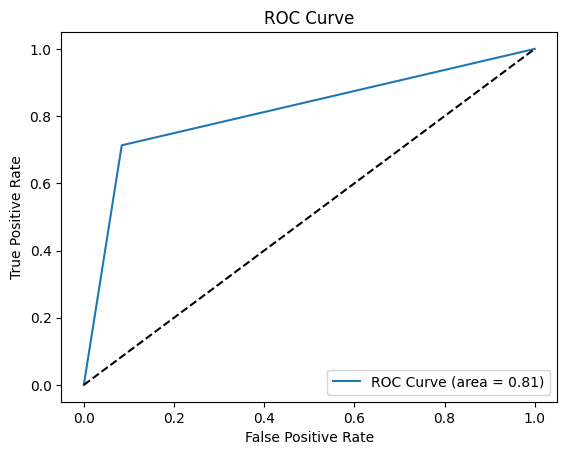

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_predL)

# Calculate ROC curve and AUC
roc_auc = roc_auc_score(y_test,y_predL)

# Print AUC
print("AUC:", roc_auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression with Regularization

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# L1 Regularization (Lasso)
L1_model = LogisticRegression(C = 0.6, penalty = 'l1', solver = 'liblinear')
L1_model.fit(X_train_transformed, y_train)
y_predL1 = L1_model.predict(X_test_transformed)
lasso_accuracy = accuracy_score(y_test, y_predL1)
# L2 Regularization (Ridge)
L2_model = LogisticRegression(C = 0.6, penalty = 'l2',  solver = 'liblinear')
L2_model.fit(X_train_transformed, y_train)
y_predL2 = L2_model.predict(X_test_transformed)
ridge_accuracy = accuracy_score(y_test, y_predL2)

# Evaluate the Lasso's performance
accuracyL1 = accuracy_score(y_test, y_predL1)
reportL1 = classification_report(y_test, y_predL1)
conf_matrixL1 = confusion_matrix(y_test, y_predL1)
# Evaluate the Ridge's performance
accuracyL2 = accuracy_score(y_test, y_predL2)
reportL2 = classification_report(y_test, y_predL2)
conf_matrixL2 = confusion_matrix(y_test, y_predL2)

# Print the evaluation results
print("======================================")
print("Lasso Performance")
print("Confusion Matrix:")
print(conf_matrixL1)
print(f"Accuracy: {accuracyL1}")
print("Classification Report:")
print(reportL1)
print("======================================")
print("Ridge Performance")
print("Confusion Matrix:")
print(conf_matrixL2)
print(f"Accuracy: {accuracyL2}")
print("Classification Report:")
print(reportL2)
print("======================================")

Lasso Performance
Confusion Matrix:
[[297  24]
 [ 38  91]]
Accuracy: 0.8622222222222222
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       321
           1       0.79      0.71      0.75       129

    accuracy                           0.86       450
   macro avg       0.84      0.82      0.83       450
weighted avg       0.86      0.86      0.86       450

Ridge Performance
Confusion Matrix:
[[296  25]
 [ 38  91]]
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       321
           1       0.78      0.71      0.74       129

    accuracy                           0.86       450
   macro avg       0.84      0.81      0.82       450
weighted avg       0.86      0.86      0.86       450



After we add the regularization terms into the previous logistic regression model, the accuracy increased from 85.78 % to 86.22 %. Although the Lasso and the Ridge regularizations ends up with the same accuracy, the Lasso regularization model has a better performance overall. They also had a different confusion matrices where Lasso has less number of false positive and more number of false negative. That shows Lasso would be a better model for our problem since it makes less mistake on people that would get hire.

## Logistic Regression Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_gridL2 = [
    {'penalty' : ['l1', 'l2'],
    'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'solver' : ['liblinear'],
    'max_iter' : [100, 200, 500, 1000]
    }
]
clfL = GridSearchCV(LogisticRegression(), param_grid = param_gridL2, cv = 10, n_jobs=-1)
clfL.fit(X_train_transformed, y_train)
print(clfL.best_estimator_)

LogisticRegression(C=0.1, solver='liblinear')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Create our new model after the hyperparameter tuning
newL = LogisticRegression(C= 0.1, solver = 'liblinear', penalty='l1')
newL.fit(X_train_transformed,y_train)
# Predict the target values for the test set
y_pred_newL = newL.predict(X_test_transformed)

# Evaluate the model's performance
accuracy_newL = accuracy_score(y_test, y_pred_newL)
report_newL = classification_report(y_test, y_pred_newL)
conf_matrix_newL = confusion_matrix(y_test, y_pred_newL)
FP = conf_matrix_newL[0][1]
FN = conf_matrix_newL[1][0]
TP = conf_matrix_newL[1][1]
TN = conf_matrix_newL[0][0]
ALL = conf_matrix_newL.sum()

# Print the evaluation results
print("New model after parameter tuning")
print("Confusion Matrix:")
print(conf_matrix_newL)
print(f"Accuracy: {accuracy_newL}")
print("Classification Report:")
print(report_newL)
precision = TP/(TP+FP)
recall = TP/(FN + TP)
print("Precision: ", precision)
print("Recall: ", recall)

New model after parameter tuning
Confusion Matrix:
[[302  19]
 [ 43  86]]
Accuracy: 0.8622222222222222
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       321
           1       0.82      0.67      0.74       129

    accuracy                           0.86       450
   macro avg       0.85      0.80      0.82       450
weighted avg       0.86      0.86      0.86       450

Precision:  0.819047619047619
Recall:  0.6666666666666666


AUC: 0.8083749909439977


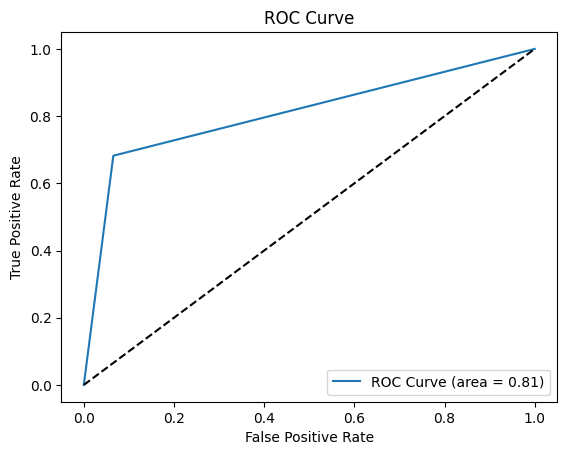

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calculate probabilities
fpr, tpr, thresholds = roc_curve(np.array(y_test),np.array(y_pred_newL))

# Calculate ROC curve and AUC
roc_auc = roc_auc_score(y_test,y_pred_newL)

# Print AUC
print("AUC:", roc_auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Although the accuracy stays the same for our new model, the number of false positive did decrease a bit, which shows the model is predicting more people get hire correctly.

## Feature Importance in Logistic Regression

<Axes: ylabel='Feature'>

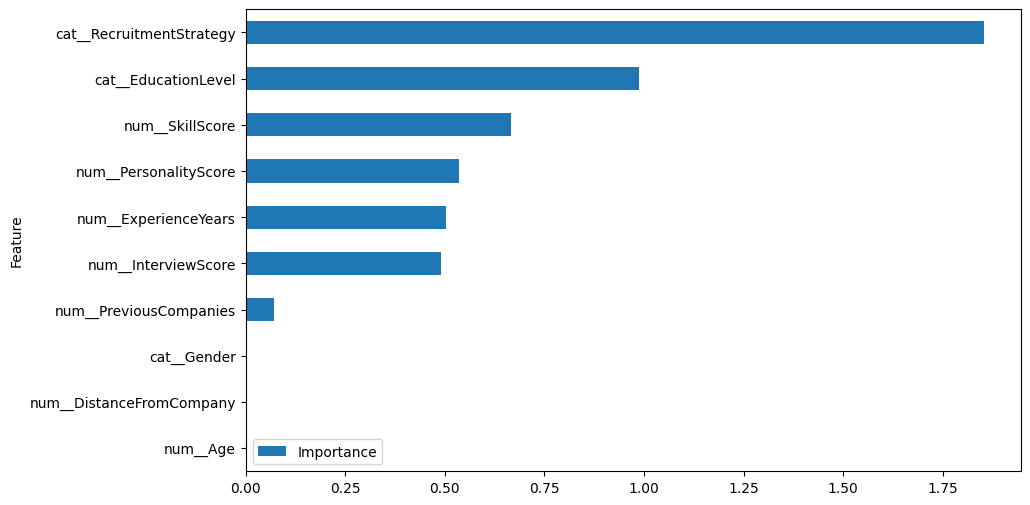

In [ ]:
feature_names = preprocessor.get_feature_names_out()
coefficients = newL.coef_[0]
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

As we can see from the plot above, there is no need to do feature selection in logistic regression as it will automaticly set the coefficent of least significant features to zero. That is equivalent as removing that feature from the dataset.

## Logistic Regression Summary

In summary, there was not a lot of imporvement in the accuracy between different models in logistic regression; However, by doing regurlation and hyperparamter tuning indeed improve the performance of the model as it reduce the number of false positive. The highest accuracy for logistic regression model is 86.22 %. In the hiring decision problem, the number of false positive is more importrant than false negative since someone might input their data into the model, but the model tells he will not get hire while he would potentially be hired. Therefore, reducing the number of false positive is what we want. Besides that, logistic regression would also exclude any unsignificant features from the dataset by setting their coefficients to zero. As the result plot shown, RecruitmentStrategy, EducationLevel, and SkillScore are the top 3 charactersist in hiredecision. That mean someone will a good recruitment strategy or a higher education level or high skill score is most likly to get hire in a company.

# Neural Network

In [ ]:
import torch
import torch.nn.functional as F

# Build the model

class RecruitmentNN1(torch.nn.Module):
  def __init__(self):
    super(RecruitmentNN1, self).__init__()

    # Note that the input has 10 features:
    #  'num__Age', 'num__ExperienceYears', 'num__PreviousCompanies',
    #  'num__DistanceFromCompany', 'num__InterviewScore', 'num__SkillScore',
    #  'num__PersonalityScore', 'cat__Gender', 'cat__EducationLevel',
    #  'cat__RecruitmentStrategy'

    # Gender is fine as is (binary in the dataset)
    # The Education Level is also fine, since it is ordinal
    # It is uncertain if Recruitment Strategies is ok as is, since it is
    #   definitely categorical, but it may also have an ordinal aspect (if it
    #   reflects the degree to which the company tried to hire the individual)

    self.linear1 = torch.nn.Linear(10, 100)
    self.activation1 = torch.nn.ReLU()
    self.dropout1 = torch.nn.Dropout(p=0.5)

    self.linear2 = torch.nn.Linear(100, 50)
    self.activation2 = torch.nn.ReLU()
    self.dropout2 = torch.nn.Dropout(p=0.5)

    self.linear3 = torch.nn.Linear(50, 1)
    self.activation3 = torch.nn.Sigmoid()

  def forward(self, x):
    x = self.linear1(x)
    x = self.activation1(x)
    x = self.dropout1(x)

    x = self.linear2(x)
    x = self.activation2(x)
    x = self.dropout2(x)

    x = self.linear3(x)
    x = self.activation3(x)
    return x

class RecruitmentNN2(torch.nn.Module):
  def __init__(self):
    super(RecruitmentNN2, self).__init__()

    self.linear1 = torch.nn.Linear(10, 20)
    self.activation1 = torch.nn.ReLU()
    self.dropout1 = torch.nn.Dropout(p=0.5)

    self.linear2 = torch.nn.Linear(20, 5)
    self.activation2 = torch.nn.ReLU()
    self.dropout2 = torch.nn.Dropout(p=0.5)

    self.linear3 = torch.nn.Linear(5, 1)
    self.activation3 = torch.nn.Sigmoid()

  def forward(self, x):
    x = self.linear1(x)
    x = self.activation1(x)
    x = self.dropout1(x)

    x = self.linear2(x)
    x = self.activation2(x)
    x = self.dropout2(x)

    x = self.linear3(x)
    x = self.activation3(x)
    return x

class RecruitmentNN3(torch.nn.Module):
  def __init__(self):
    super(RecruitmentNN3, self).__init__()

    self.linear1 = torch.nn.Linear(10, 100)
    self.activation1 = torch.nn.ReLU()
    self.dropout1 = torch.nn.Dropout(p=0.5)

    self.linear2 = torch.nn.Linear(100, 200)
    self.activation2 = torch.nn.ReLU()
    self.dropout2 = torch.nn.Dropout(p=0.5)

    self.linear3 = torch.nn.Linear(200, 200)
    self.activation3 = torch.nn.ReLU()
    self.dropout3 = torch.nn.Dropout(p=0.5)

    self.linear4 = torch.nn.Linear(200, 100)
    self.activation4 = torch.nn.ReLU()
    self.dropout4 = torch.nn.Dropout(p=0.5)

    self.linear5 = torch.nn.Linear(100, 1)
    self.activation5 = torch.nn.Sigmoid()

  def forward(self, x):
    x = self.linear1(x)
    x = self.activation1(x)
    x = self.dropout1(x)

    x = self.linear2(x)
    x = self.activation2(x)
    x = self.dropout2(x)

    x = self.linear3(x)
    x = self.activation3(x)
    x = self.dropout3(x)

    x = self.linear4(x)
    x = self.activation4(x)
    x = self.dropout4(x)

    x = self.linear5(x)
    x = self.activation5(x)
    return x


In [ ]:
# Define training loop
def train_loop(model, X, Y, learning_rate=1e-3, epochs=10,
               random_seed=1, verbose=False):
  np.random.seed(random_seed)

  model.train()
  loss_function = torch.nn.BCELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  training_pairs = list(zip(X,Y))

  for e in range(epochs):
    np.random.shuffle(training_pairs)
    avg_loss = 0
    size = 0
    for (curX, curY) in training_pairs:
      tensorX = torch.Tensor(curX)
      pred = model(tensorX)
      loss = loss_function(pred, torch.Tensor([curY]))
      avg_loss += loss
      size += 1

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    if(verbose):
      print(f"Epoch ({e}), average loss: {avg_loss / size}")

# Define Testing Function
def evaluate_model(model, X, Y, threshold=0.5, verbose=0):
  model.eval()
  loss_function = torch.nn.BCELoss()

  with torch.no_grad():
    test_pairs = zip(X,Y)

    size = 0
    correct = 0
    test_loss = 0

    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0

    predictions = []

    for (curX, curY) in test_pairs:
      size += 1
      tensorX = torch.Tensor(curX)
      pred = model(tensorX)

      test_loss += loss_function(pred, torch.Tensor([curY]))
      true_positive += (pred[0] > threshold) and (curY)
      true_negative += (pred[0] <= threshold) and (not curY)
      false_positive += (pred[0] > threshold) and (not curY)
      false_negative += (pred[0] <= threshold) and (curY)

      correct += int((pred[0] > threshold) == curY)
      if(verbose > 1):
        print(f"Prediction: [{(float(pred)):0.5f}], Output: [{(pred[0] > threshold)}] Label: [{curY}]")

      predictions.append(pred[0])

    test_loss = test_loss / size
    accuracy = correct / size

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)
    f1 = 2 * precision * recall / (precision + recall)

    confusion = [[true_positive, false_negative], [false_positive, true_negative]]

    if(verbose > 0):
      print(f"Average Test Loss: {test_loss:>8f}")
      print(f"Test Accuracy: {100 * accuracy:>0.1f}%")
      print(f"Test Precision: {100 * precision:>0.1f}%")
      print(f"Test Recall: {100 * recall:>0.1f}%")
      print(f"Test Specificity: {100 * specificity:>0.1f}%")
      print(f"Test F1 score: {100 * f1:>0.1f}%")

    return test_loss, accuracy, predictions, confusion


# Define Cross Validation function
def cross_validation(model_class, X, Y, learning_rate=1e-3, epochs=10,
                     max_k=3, random_seed=1, verbose=False):
  input_splits = np.split(X,max_k)
  label_splits = np.split(Y,max_k)

  average_loss = 0
  average_acc = 0
  for k in range(max_k):
    training_inputs = np.concatenate([input_splits[i] for i in range(len(input_splits)) if i != k])
    training_labels = np.concatenate([label_splits[i] for i in range(len(label_splits)) if i != k])
    validation_inputs = input_splits[k]
    validation_labels = label_splits[k]

    current_model = model_class()

    if(verbose):
      print("Split",k)
    train_loop(current_model, training_inputs, training_labels,
               learning_rate=learning_rate, epochs=epochs,
               random_seed=random_seed, verbose=verbose)
    loss, acc, _, _ = evaluate_model(current_model, validation_inputs,
                               validation_labels, threshold=0.5, verbose=verbose)
    average_loss += loss
    average_acc += acc

  average_loss = average_loss / max_k
  average_acc = average_acc / max_k

  print(f"Average Validation Loss: {average_loss:>8f}")
  print(f"Average Validation Accuracy: {100 * average_acc:>0.1f}%")

  return average_acc


In [ ]:
import numpy as np

# Train the Neural Network
recNN = RecruitmentNN1()
train_loop(recNN, np.array(X_train_transformed_df.values), np.array(y_train),
           learning_rate=1e-3, epochs=20, random_seed=1,
           verbose=True)

Epoch (0), average loss: 0.6580567359924316
Epoch (1), average loss: 0.6202387809753418
Epoch (2), average loss: 0.6104446053504944
Epoch (3), average loss: 0.5946335196495056
Epoch (4), average loss: 0.5892184376716614
Epoch (5), average loss: 0.575958788394928
Epoch (6), average loss: 0.5572365522384644
Epoch (7), average loss: 0.5436325669288635
Epoch (8), average loss: 0.520838737487793
Epoch (9), average loss: 0.5016376972198486
Epoch (10), average loss: 0.5006250143051147
Epoch (11), average loss: 0.49782854318618774
Epoch (12), average loss: 0.48767903447151184
Epoch (13), average loss: 0.4838498830795288
Epoch (14), average loss: 0.4808066785335541
Epoch (15), average loss: 0.45822176337242126
Epoch (16), average loss: 0.45494091510772705
Epoch (17), average loss: 0.4591844081878662
Epoch (18), average loss: 0.458523690700531
Epoch (19), average loss: 0.4600166380405426


In [ ]:
# Test the Neural Network
eval_results = evaluate_model(recNN, np.array(X_test_transformed_df.values), np.array(y_test), verbose=False)
print(eval_results[0],eval_results[1])

tensor(0.4156) 0.8466666666666667


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

model_list = [RecruitmentNN1, RecruitmentNN2, RecruitmentNN3]

learning_rates = [1e-2, 5e-3, 1e-3]
epoch_list = [10,20,30]

_x = epoch_list
_y = learning_rates
_xx, _yy = np.meshgrid(_x, _y)
epochs_graph, lr_graph = _xx.ravel(), _yy.ravel()

model_accuracies = [[],[],[]]

for learning_rate in learning_rates:
  for epochs in epoch_list:
    for model in range(len(model_list)):
      print(f"Model: {model+1}, Epochs: {epochs}, Learning Rate: {learning_rate}")

      acc = cross_validation(model_list[model], np.array(X_train_transformed_df.values),
                      np.array(y_train), learning_rate=learning_rate, epochs=epochs,
                      max_k=3, random_seed=1, verbose=True)
      model_accuracies[model].append(acc)
      print("###################################################################")


Model: 1, Epochs: 10, Learning Rate: 0.01
Split 0
Epoch (0), average loss: 0.6061187982559204
Epoch (1), average loss: 0.5160523056983948
Epoch (2), average loss: 0.497130423784256
Epoch (3), average loss: 0.4790765345096588
Epoch (4), average loss: 0.476154625415802
Epoch (5), average loss: 0.4292777478694916
Epoch (6), average loss: 0.4381895661354065
Epoch (7), average loss: 0.39008378982543945
Epoch (8), average loss: 0.4079326391220093
Epoch (9), average loss: 0.39917492866516113
Average Test Loss: 0.334653
Test Accuracy: 85.7%
Test Precision: 77.1%
Test Recall: 75.7%
Test Specificity: 90.1%
Test F1 score: 76.4%
Split 1
Epoch (0), average loss: 0.6291185021400452
Epoch (1), average loss: 0.5330098867416382
Epoch (2), average loss: 0.48869842290878296
Epoch (3), average loss: 0.4717625677585602
Epoch (4), average loss: 0.45698413252830505
Epoch (5), average loss: 0.45436400175094604
Epoch (6), average loss: 0.41993260383605957
Epoch (7), average loss: 0.41266342997550964
Epoch (8),

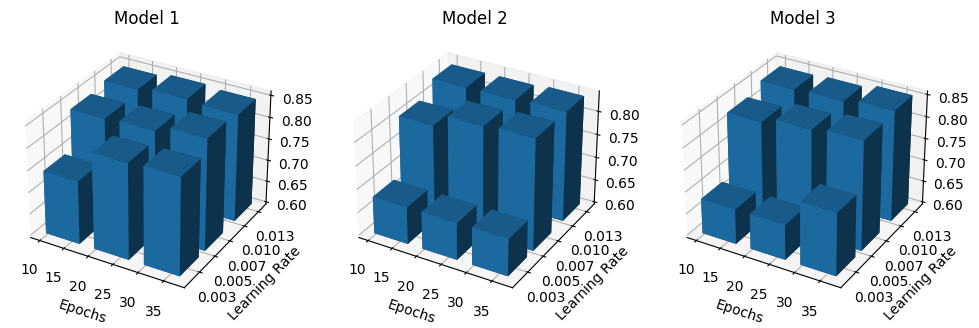

In [ ]:
bottom = np.zeros_like(model_accuracies[0]) + 0.6
depth = 3e-3
width = 7

shifted_results = [[],[],[]]
s_index = 0
for i in model_accuracies:
  for j in i:
    shifted_results[s_index].append(j - 0.6)
  s_index += 1

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
ax1.bar3d(epochs_graph, lr_graph, bottom, width, depth, shifted_results[0], shade=True)
ax1.set_title('Model 1')
ax1.xaxis.set_label_text('Epochs')
ax1.yaxis.set_label_text('Learning Rate')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

ax2.bar3d(epochs_graph, lr_graph, bottom, width, depth, shifted_results[1], shade=True)
ax2.set_title('Model 2')
ax2.xaxis.set_label_text('Epochs')
ax2.yaxis.set_label_text('Learning Rate')
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

ax3.bar3d(epochs_graph, lr_graph, bottom, width, depth, shifted_results[2], shade=True)
ax3.set_title('Model 3')
ax3.xaxis.set_label_text('Epochs')
ax3.yaxis.set_label_text('Learning Rate')
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

In [ ]:
# Best Model
import numpy as np

bestNN = RecruitmentNN1()
train_loop(bestNN, np.array(X_train_transformed_df.values), np.array(y_train),
           learning_rate=1e-2, epochs=30, random_seed=1,
           verbose=True)

# Test the Neural Network
eval_res = evaluate_model(recNN, np.array(X_test_transformed_df.values), np.array(y_test), verbose=1)


Epoch (0), average loss: 0.5764569044113159
Epoch (1), average loss: 0.4927501976490021
Epoch (2), average loss: 0.44429680705070496
Epoch (3), average loss: 0.43276360630989075
Epoch (4), average loss: 0.4025120735168457
Epoch (5), average loss: 0.40707871317863464
Epoch (6), average loss: 0.41383033990859985
Epoch (7), average loss: 0.3873996138572693
Epoch (8), average loss: 0.37538811564445496
Epoch (9), average loss: 0.37422534823417664
Epoch (10), average loss: 0.3784794509410858
Epoch (11), average loss: 0.3649201989173889
Epoch (12), average loss: 0.3647192418575287
Epoch (13), average loss: 0.3833547830581665
Epoch (14), average loss: 0.3553619980812073
Epoch (15), average loss: 0.37214553356170654
Epoch (16), average loss: 0.3504716157913208
Epoch (17), average loss: 0.3593512177467346
Epoch (18), average loss: 0.33842721581459045
Epoch (19), average loss: 0.34781789779663086
Epoch (20), average loss: 0.34364259243011475
Epoch (21), average loss: 0.34083178639411926
Epoch (22

AUC: 0.8564321765799706


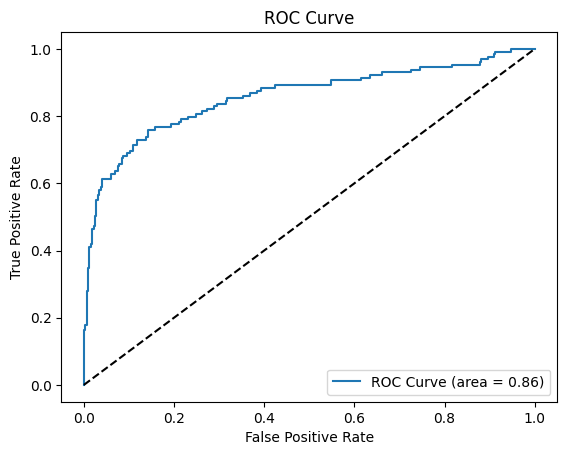

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Calculate probabilities
fpr, tpr, thresholds = roc_curve(y_test, eval_res[2])

# Calculate ROC curve and AUC
roc_auc = roc_auc_score(y_test,eval_res[2])

# Print AUC
print("AUC:", roc_auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machine (SVM)

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_transformed, y_train)

# Predict the target values for the test set
y_pred_svm = svm_classifier.predict(X_test_transformed)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Print the evaluation results
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:")
print(report_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)

Accuracy: 0.8711111111111111
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       321
           1       0.81      0.72      0.76       129

    accuracy                           0.87       450
   macro avg       0.85      0.83      0.84       450
weighted avg       0.87      0.87      0.87       450

Confusion Matrix:
[[299  22]
 [ 36  93]]


We find the performance of the base SVM model to be good with an accuracy of 0.871111; in this classification task, the model does a better job of predicting the majority class 0 (not hired), with precision and recall scores of 0.89 and 0.93, respectively.  It predicts class 1 with a slightly worse precision and recall of 0.81 and 0.72.  This base model succeeds well, and is competetive in classification accuracy with several of the other trained models without much finetuning.  We shall see if it can be improved.

## Grid Search Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'] ## used when kernel='rbf', 'sigmoid' or 'poly'
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_transformed, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_transformed)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_best)
report_svm = classification_report(y_test, y_pred_best)
conf_matrix_svm = confusion_matrix(y_test, y_pred_best)

# Print the evaluation results
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:")
print(report_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)

Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score: 0.8666666666666666
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       321
           1       0.82      0.74      0.78       129

    accuracy                           0.88       450
   macro avg       0.86      0.84      0.85       450
weighted avg       0.88      0.88      0.88       450

Confusion Matrix:
[[300  21]
 [ 33  96]]


We can see here that after cross validating across the listed grid of parameters.  The optimized parameter values come to be, C = 1, gamma = 'auto', kernel = 'rbf', and give us an accuracy score of 0.88.  This is due to one extra FP->TP, and three more FN->TN.  This improves our precision and recall scores for both classifying groups.

## Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_distributions = {
    'C': list(uniform(0.01, 1).rvs(10)) + list(uniform(11, 100).rvs(10)),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(uniform(0.1, 10).rvs(10)), ## used when kernel='rbf', 'sigmoid', or 'poly'
    'coef0': uniform(0, 1) ## used when kernel='poly
}

random_search = RandomizedSearchCV(SVC(), param_distributions,
                                   n_iter=50,
                                   cv=5,
                                   n_jobs=-1,
                                   scoring='accuracy',
                                   random_state=42)
random_search.fit(X_train_transformed, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test_transformed)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_best)
report_svm = classification_report(y_test, y_pred_best)
conf_matrix_svm = confusion_matrix(y_test, y_pred_best)

# Print the evaluation results
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:")
print(report_svm)
print("Confusion Matrix:")

Best Parameters: {'C': 0.8653062070711903, 'coef0': 0.3042422429595377, 'gamma': 8.889690940677575, 'kernel': 'linear'}
Best Score: 0.858095238095238
Accuracy: 0.8688888888888889
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       321
           1       0.80      0.72      0.76       129

    accuracy                           0.87       450
   macro avg       0.85      0.82      0.83       450
weighted avg       0.87      0.87      0.87       450

Confusion Matrix:


In [ ]:
print(conf_matrix_svm)

[[298  23]
 [ 36  93]]


Random Search CV works similarly to Grid Search CV, except instead of iterating through a given grid of parameter values, it randomly selects them from a curated range during each iteration.  Here we see however, that it does not yeild significant performance improvements from grid search or even the original svm split.  We ran this a few times with different numbers of iterations, and could not get the score much past where it is now, at 0.86888; one further idea is to run this alg a few times and store the 'best' parameter values.  One could then enter the values C = 0.5128085, coef0 = 0.503764, ..., kernel = 'linear', etc. into the grid search list and in theory it would only increase potential performance.

AUC: 0.8277548359052379


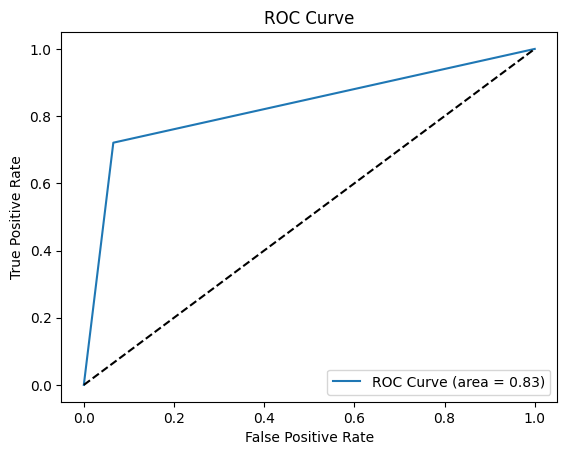

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Calculate probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best)

# Calculate ROC curve and AUC
roc_auc = roc_auc_score(y_test,y_pred_best)

# Print AUC
print("AUC:", roc_auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

The ROC shows good performance on the dataset as the FP rate drops to a certain point.  After many iterations of grid and random search cv, it seems that we have found roughly the maximal margin for this dataset, as improvement begins to slow.

## feature importance in SVM

<Axes: ylabel='Feature'>

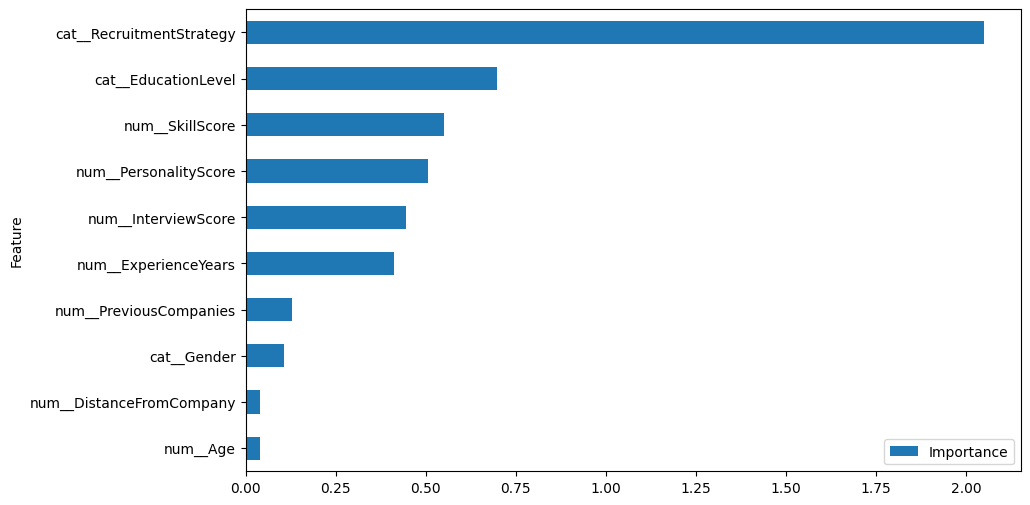

In [ ]:
feature_names = preprocessor.get_feature_names_out()
coefficients = best_model.coef_[0]
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

SVM does a worse job of utilizing a sparse feature set than others do.  Past num_ExperienceYears, there is not much feature impact, but the model still includes them (it may be better to prune these).  Otherwise, we see recruitment strategy is by far the most important feature, followed by education level, then skill, personality, and interview scores.

# KNN Classification Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier()

# Train the classifier on the preprocessed training data
knn.fit(X_train_transformed_df, y_train)

# Predict the target values for the test set
y_pred = knn.predict(X_test_transformed_df)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8155555555555556
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       321
           1       0.72      0.58      0.64       129

    accuracy                           0.82       450
   macro avg       0.78      0.75      0.76       450
weighted avg       0.81      0.82      0.81       450

Confusion Matrix:
[[292  29]
 [ 54  75]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# Feature selection
selector = SelectKBest(score_func=f_classif, k='all')

# KNN Classifier
knn = KNeighborsClassifier()

# Pipeline for feature selection and classification
pipeline = Pipeline(steps=[('feature_selection', selector), ('knn', knn)])

# Define the parameter grid for KNeighborsClassifier
param_grid = {
    'feature_selection__k': [5, 7, 10],  # Number of top features to select
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Instantiate the GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_transformed_df, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the final model with the best parameters
best_model = grid_search.best_estimator_

# Evaluate the final model on the test set
y_pred = best_model.predict(X_test_transformed_df)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'feature_selection__k': 7, 'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
Best Cross-Validation Accuracy: 0.8676190476190475
Test Accuracy: 0.8888888888888888
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       321
           1       0.88      0.71      0.79       129

    accuracy                           0.89       450
   macro avg       0.88      0.84      0.86       450
weighted avg       0.89      0.89      0.89       450

Confusion Matrix:
[[308  13]
 [ 37  92]]


AUC: 0.7859523292037962


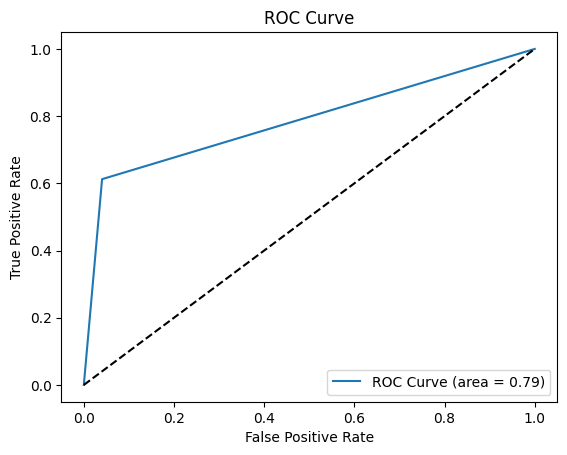

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Calculate probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate ROC curve and AUC
roc_auc = roc_auc_score(y_test,y_pred)

# Print AUC
print("AUC:", roc_auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Plotting Accuracy vs. K



Fitting 5 folds for each of 12 candidates, totalling 60 fits


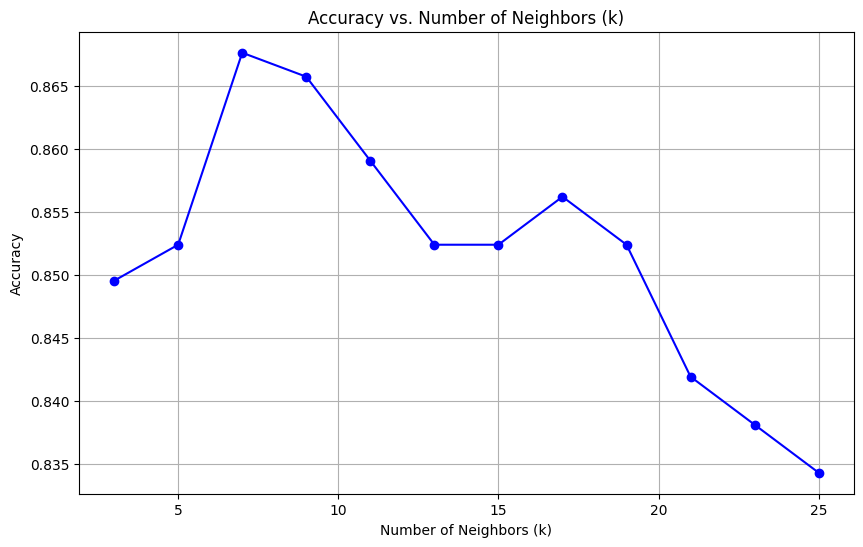

({'feature_selection__k': 7,
  'knn__metric': 'manhattan',
  'knn__n_neighbors': 7,
  'knn__weights': 'uniform'},
 0.8676190476190475)

In [ ]:
# Feature selection
selector = SelectKBest(score_func=f_classif, k='all')

# KNN Classifier
knn = KNeighborsClassifier()

# Pipeline for feature selection and classification
pipeline = Pipeline(steps=[('feature_selection', selector), ('knn', knn)])

# Define the parameter grid for KNeighborsClassifier
param_grid = {
    'feature_selection__k': [7],  # Using the best found number of features
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
    'knn__weights': ['uniform'],
    'knn__metric': ['manhattan']
}

# Instantiate the GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_transformed_df, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the final model with the best parameters
best_model = grid_search.best_estimator_

# Evaluate the final model on the test set
y_pred = best_model.predict(X_test_transformed_df)
accuracy = accuracy_score(y_test, y_pred)

# Extract the mean test scores for each value of k
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Plotting accuracy vs. k values
k_values = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.grid(True)
plt.show()

# Return the grid search results and the best parameters
best_params, best_score

###Conclusion:

By incorporating feature selection and hyperparameter tuning, we significantly improved the KNN model's performance. The best model achieved a **test accuracy of 88.89%**.

Initial Model Training:

- Trained a KNN classifier using all preprocessed features.
- Achieved an initial test accuracy of 85%.

Hyperparameter Tuning:
- Defined a parameter grid for n_neighbors, weights, and metric.
- Used GridSearchCV for hyperparameter tuning with CV to find best parameters.

Feature Selection and Advanced Hyperparameter Tuning:
- Added feature selection using SelectKBest to the pipeline.
- Performed Grid Search again, including feature selection and KNN hyperparameters.

Best Parameters:

- Number of top features selected (k): 7
- Distance metric: Manhattan
- Number of neighbors (n_neighbors): 7
- Weight function: Uniform


#Conclusion
